# Explore flight delay data wrt day of week

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style('white')

# Load data

In [2]:
# Import custom code
from flightdelay.fld import io as flio
airlines_df, airports_df, flights_df = flio.load_data()

In [3]:
# Filter data to keys of interest
keys = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY']
flights_df = flights_df[keys]

In [4]:
all_airports, airport_inverse, airport_count = np.unique(flights_df['ORIGIN_AIRPORT'],return_counts=True,return_inverse=True)

# Determine number of flights for the origin airport
Nflights_orig = np.zeros(len(airport_inverse))
for i in range(len(all_airports)):
    Nflights_orig[np.where(airport_inverse==i)] = airport_count[i]
    
flights_df = flights_df.loc[flights_df.index[Nflights_orig>=7300]]

In [5]:
# Remove cancelled flights
flights_df = flights_df.dropna()
flights_df.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0


In [8]:
# Separate data by airport
all_airports, airport_inverse, airport_count = np.unique(flights_df['ORIGIN_AIRPORT'],return_counts=True,return_inverse=True)

airport_dfs = {}
for k in all_airports:
    airport_dfs[k] = flights_df[flights_df['ORIGIN_AIRPORT']==k]

# Airline by all flights

In [79]:
gb_aph = flights_df[['AIRLINE','DEPARTURE_DELAY']].groupby(['AIRLINE'])
mean_delays = gb_aph.agg(['mean','count','sem'])

In [80]:
mean_delays

DEPARTURE_DELAY                   
                   mean    count       sem
AIRLINE                                   
AA             8.814182   706356  0.049181
AS             1.740438   153131  0.064412
B6            11.544661   252074  0.075979
DL             7.448257   824590  0.039358
EV             8.978228   414208  0.057679
F9            13.315054    85998  0.167977
HA             0.596751    69994  0.092610
MQ            10.865799   210028  0.084284
NK            16.431178   105395  0.135390
OO             8.328241   455687  0.053531
UA            14.349328   501843  0.058859
US             6.089295   193337  0.065585
VX             8.993486    61248  0.130710
WN            10.593374  1215637  0.027723

In [108]:
als = np.array(list(mean_delays.index))
ds = mean_delays['DEPARTURE_DELAY']['mean'].values
ss = mean_delays['DEPARTURE_DELAY']['sem'].values

In [109]:
print(als)
print(ds)

['AA' 'AS' 'B6' 'DL' 'EV' 'F9' 'HA' 'MQ' 'NK' 'OO' 'UA' 'US' 'VX' 'WN']
[  8.81418152   1.74043793  11.54466149   7.44825671   8.97822833
  13.31505384   0.59675115  10.86579885  16.43117795   8.32824066
  14.34932838   6.08929486   8.9934855   10.59337368]


In [110]:
als = als[np.argsort(ds)]
ss = ss[np.argsort(ds)]
ds = ds[np.argsort(ds)]

In [111]:
print(als)
print(ds)

['HA' 'AS' 'US' 'DL' 'OO' 'AA' 'EV' 'VX' 'WN' 'MQ' 'B6' 'F9' 'UA' 'NK']
[  0.59675115   1.74043793   6.08929486   7.44825671   8.32824066
   8.81418152   8.97822833   8.9934855   10.59337368  10.86579885
  11.54466149  13.31505384  14.34932838  16.43117795]


/Users/scott/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


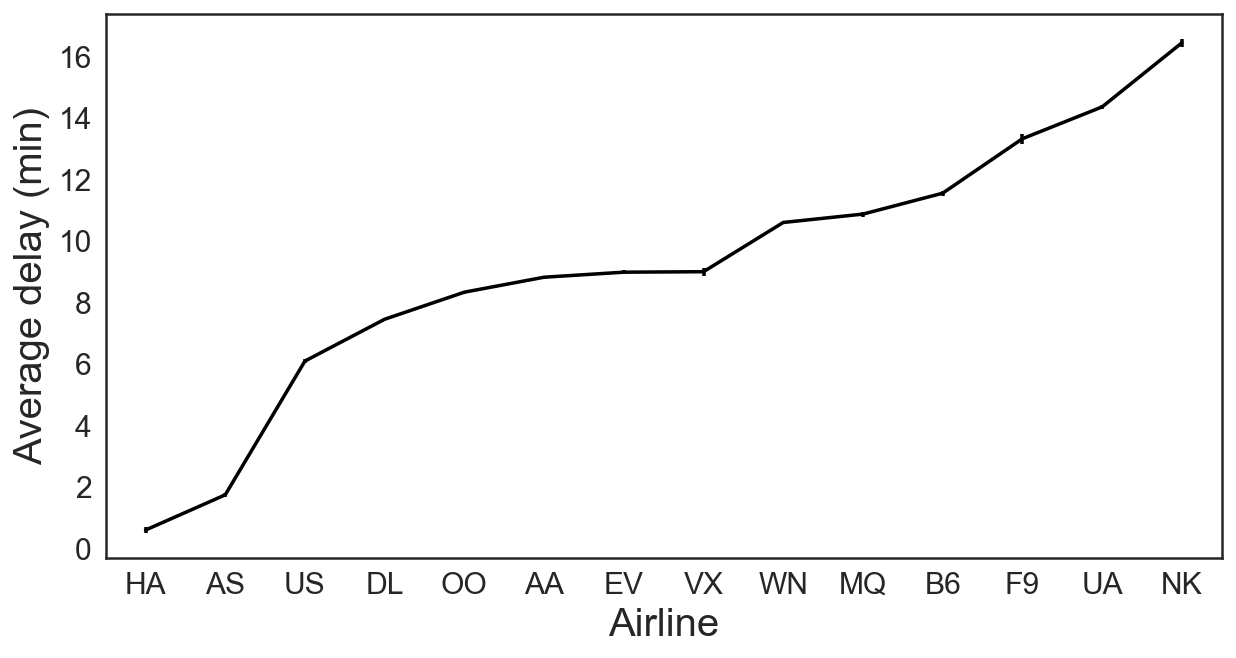

In [113]:
plt.figure(figsize=(10,5))
plt.errorbar(np.arange(len(als)), ds, yerr=ss,color='k')
plt.xlabel('Airline',size=20)
plt.ylabel('Average delay (min)', size=20)
plt.xlim((-.5,13.5))
plt.yticks(size=15)
plt.xticks(np.arange(len(als)),als,size=15)
plt.legend(loc='best',fontsize=12)

In [115]:
df_al, df_ap = util.load_data_lines_and_ports()
df_al.loc[als]

,AIRLINE
IATA_CODE,
HA,Hawaiian Airlines Inc.
AS,Alaska Airlines Inc.
US,US Airways Inc.
DL,Delta Air Lines Inc.
OO,Skywest Airlines Inc.
AA,American Airlines Inc.
EV,Atlantic Southeast Airlines
VX,Virgin America
WN,Southwest Airlines Co.


# Airline for one airport

In [116]:
gb_aph = flights_df[['AIRLINE','ORIGIN_AIRPORT','DEPARTURE_DELAY']].groupby(['ORIGIN_AIRPORT','AIRLINE'])
mean_delays = gb_aph.agg(['mean','count','sem'])

In [150]:
ap = 'SAN'
SAN_als = list(mean_delays.loc[ap].index)
SAN_means = mean_delays.loc[ap]['DEPARTURE_DELAY']['mean'].values
SAN_ss = mean_delays.loc[ap]['DEPARTURE_DELAY']['sem'].values

N_SANals = len(SAN_als)
SAN_als_idx = np.zeros(N_SANals)
for i, al in enumerate(SAN_als):
    SAN_als_idx[i] = np.argwhere(als==al)[0][0]
    
SAN_means = SAN_means[np.argsort(SAN_als_idx)]
SAN_ss = SAN_ss[np.argsort(SAN_als_idx)]
SAN_als_idx = SAN_als_idx[np.argsort(SAN_als_idx)]

In [154]:
ap = 'JFK'
JFK_als = list(mean_delays.loc[ap].index)
JFK_means = mean_delays.loc[ap]['DEPARTURE_DELAY']['mean'].values
JFK_ss = mean_delays.loc[ap]['DEPARTURE_DELAY']['sem'].values

N_JFKals = len(JFK_als)
JFK_als_idx = np.zeros(N_JFKals)
for i, al in enumerate(JFK_als):
    JFK_als_idx[i] = np.argwhere(als==al)[0][0]
    
JFK_means = JFK_means[np.argsort(JFK_als_idx)]
JFK_ss = JFK_ss[np.argsort(JFK_als_idx)]
JFK_als_idx = JFK_als_idx[np.argsort(JFK_als_idx)]

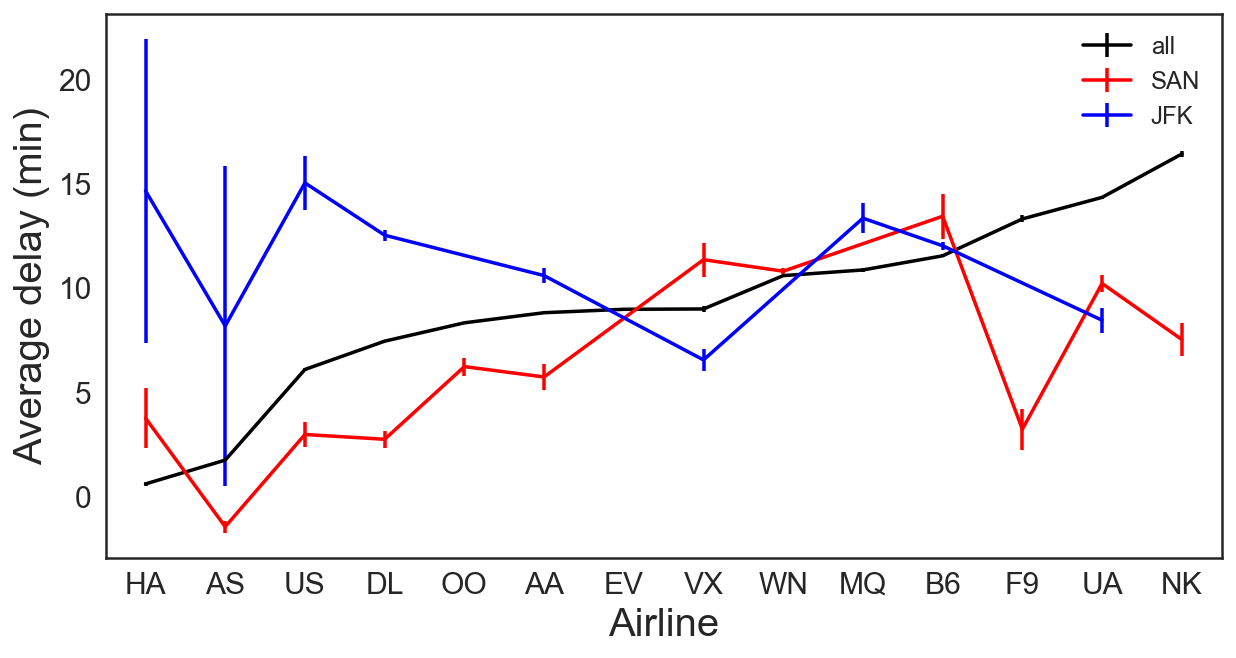

In [155]:
# plot individual airport with average
plt.figure(figsize=(10,5))
plt.errorbar(np.arange(len(als)), ds, yerr=ss,color='k',label='all')
plt.errorbar(SAN_als_idx, SAN_means, yerr=SAN_ss,color='r',label='SAN')
plt.errorbar(JFK_als_idx, JFK_means, yerr=JFK_ss,color='b',label='JFK')
plt.xlabel('Airline',size=20)
plt.ylabel('Average delay (min)', size=20)
plt.xlim((-.5,13.5))
plt.yticks(size=15)
plt.xticks(np.arange(len(als)),als,size=15)
plt.legend(loc='best',fontsize=12)

In [149]:
mean_delays.loc['SAN']

DEPARTURE_DELAY                 
                   mean  count       sem
AIRLINE                                 
AA             5.729726   7152  0.602658
AS            -1.456285   5593  0.296513
B6            13.442393   1354  1.069147
DL             2.740057   6336  0.413623
F9             3.222615    849  0.975466
HA             3.756164    365  1.433994
NK             7.529618   1992  0.811389
OO             6.226950   6768  0.431871
UA            10.217953   8355  0.413389
US             2.969358   1697  0.617824
VX            11.358759   1901  0.821346
WN            10.805784  33092  0.156830